In [26]:
# Modules to Import

import pandas as pd
from MultiLangEvaluateChatBot import EvalChatBot
from ChatBot import ChatBot

from datasets import Dataset, Features, Sequence, Value
from ragas import evaluate
import ast

NUMBER_OF_QUESTION = 50
# import time
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision
)


In [27]:
# test_set_df
uploaded_file = "../../pdfData/Cells and Chemistry of Life.pdf"

In [28]:
df = pd.read_csv("./testSet.csv")
#df['ground_truth'] = ground_truthList
questionList = []
answerList = []
contextList = []
addition_message = "Trả lời chi tiết bằng tiếng việt câu hỏi sau: "

for i in range(len(df['question'])):
    questionList.append(addition_message + df['question'][i])



In [29]:
for i in range(len(df['question'])):
    print(questionList[i])
    result_dict = EvalChatBot(uploaded_file,questionList[i])
    answerList.append(result_dict['answer'])
    contextList.append(result_dict['contexts'])


Trả lời chi tiết bằng tiếng việt câu hỏi sau: What are some of the different parts of a cell and what do they do?
Trả lời chi tiết bằng tiếng việt câu hỏi sau: What are the three main parts that make up the protoplasm of a cell?
Trả lời chi tiết bằng tiếng việt câu hỏi sau: What are the main functions of the Golgi body in a cell?
Trả lời chi tiết bằng tiếng việt câu hỏi sau: What is the difference between a plant cell and an animal cell in terms of organelles and their functions?
Trả lời chi tiết bằng tiếng việt câu hỏi sau: What are two key differences between plant cells and animal cells that are visible under a light microscope?
Trả lời chi tiết bằng tiếng việt câu hỏi sau: Why do different types of cells have different shapes and structures?
Trả lời chi tiết bằng tiếng việt câu hỏi sau: How can plant tissue culture help improve the environment and the lives of people in less developed countries?
Trả lời chi tiết bằng tiếng việt câu hỏi sau: How are red blood cells adapted to delive

In [42]:
df = pd.DataFrame({'question': questionList, 'answer': answerList, 'contexts': contextList})
df.to_csv("./testSet_multilanguage.csv", index=False) 

In [54]:
# i = 9
# with open("./doingTestSet.txt", 'w', encoding='utf8') as file:
#     file.writelines("Trả lời câu hỏi này bằng tiếng việt dựa trên trường context. Tôi sẽ biến câu trả lời của bạn thành trường ground_truth của tôi để tôi có thể đạt trên 90 phần trăm điểm ragas. Trả lời trong 40 từ" + "\n")
#     file.writelines("question: " + str(questionList[i]) + "\n")
#     file.writelines("answer : " + str(answerList[i]) + "\n")
#     file.writelines("context: " + str(contextList[i]))
# print("question: " + str(questionList[i]))
# print("context: " + str(contextList[i]))

question: Trả lời chi tiết bằng tiếng việt câu hỏi sau: How does diffusion work and what factors affect the rate of diffusion in plants and humans?
context: ['20 Chapter 2 Cells and the Chemistry of LifeMovement of SubstancesChapter 2 2.1 What Is Diffusion? Learning Outcomes• Define diffusion and describe its role in nutrient uptake and gaseous exchange in plants and\xa0humans. • Describe the factors that affect the rate of diffusion. DiffusionImagine that you are sitting in the living room reading a book. Your sister accidentally spills a bottle of perfume in the living room. Gradually, you become aware of a pleasant scent spreading through the living room.Figure 2.1 illustrates how diffusion takes place. Figure 2.1 Diffusion of perfume particlesPerfume, like all matter, is made up of particles such as atoms, molecules or ions.Individual particles of perfume evaporate from the surface of the spill, that is, they become a\xa0gas.The gas particles have kinetic energy and are constantly 

In [55]:
ground_truthList = []
with open('./ground_truth_multilang.txt', 'r', encoding='utf8') as file:
    a = file.readlines()
for groundTruth in a:
    ground_truthList.append(groundTruth)
ground_truthList[4]

'Hai sự khác biệt chính giữa tế bào thực vật và tế bào động vật dễ thấy dưới kính hiển vi ánh sáng là tế bào thực vật có tường bào và lục lạp, trong khi tế bào động vật thì không có những cấu trúc này.\n'

In [56]:
df = pd.read_csv("./testSet_multilanguage.csv")
#df['ground_truth'] = ground_truthList
questionList = df['question']
answerList = df['answer']
contextList = df['contexts']

In [57]:
contextListConvertedEleToList = [ast.literal_eval(context) for context in contextList]
type(contextListConvertedEleToList[0])

list

In [58]:
# Ensure your contexts are lists of strings
data = {
    "question": questionList[:10], #! replace with question list!
    "answer": answerList[:10],  #! replace with response from chatbot
    "contexts": contextListConvertedEleToList[:10],  
    "ground_truth": ground_truthList[:10] #! replace with response from EvaluateChatbot
}

# Define the features explicitly to ensure correct data types
features = Features({
    "question": Value("string"),
    "answer": Value("string"),
    "contexts": Sequence(Value("string")),  # Ensuring contexts is treated as a sequence of strings
    "ground_truth": Value("string")
})

# Convert the dictionary to a Dataset with the specified features
dataset = Dataset.from_dict(data, features=features)

# Perform the evaluation using the adjusted dataset
result = evaluate(
    dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall
    ],
)

print(result)


Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

{'context_precision': 0.9139, 'faithfulness': 0.8167, 'answer_relevancy': 0.6894, 'context_recall': 1.0000}


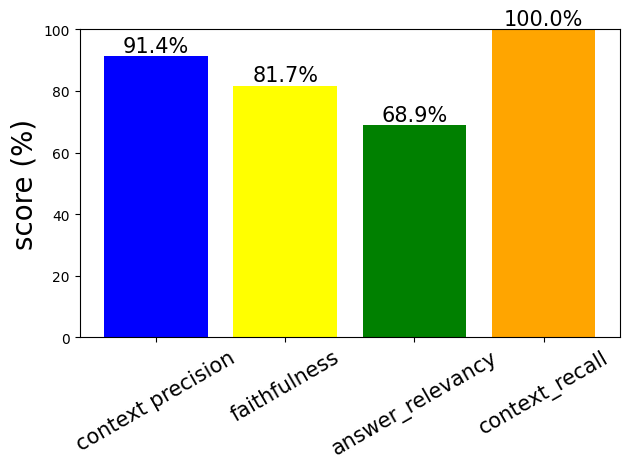

In [59]:
import matplotlib.pyplot as plt
myCol = [result['context_precision'], result['faithfulness'], result['answer_relevancy'], result['context_recall']]
for i in range(4):
    myCol[i] = myCol[i]*100
cate = ['context precision', 'faithfulness', 'answer_relevancy', 'context_recall']
myRow = [1,2,3,4]
colors = ['blue','yellow','green','orange']
plt.bar(myRow, myCol, tick_label=cate, color=colors)
for i, value in enumerate(myCol):
    plt.text(myRow[i], value + 0.1, str(round(value, 1)) + "%", ha='center', va='bottom', size=15)
plt.ylabel("score (%)", size=20)
plt.xticks(size=15, rotation=30)
plt.ylim([0,100])
plt.tight_layout()